In [1]:
import random
import pandas as pd
import numpy as np
import cv2

gt_dir = '/home/mykang/mmsegmentation/data/Satellite/img_dir/test'

sub = pd.read_csv('/home/mykang/mmsegmentation/_EDA/result.csv')

assert len(sub) == 60640, len(sub)

def rle_decode(mask_rle, shape):
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)


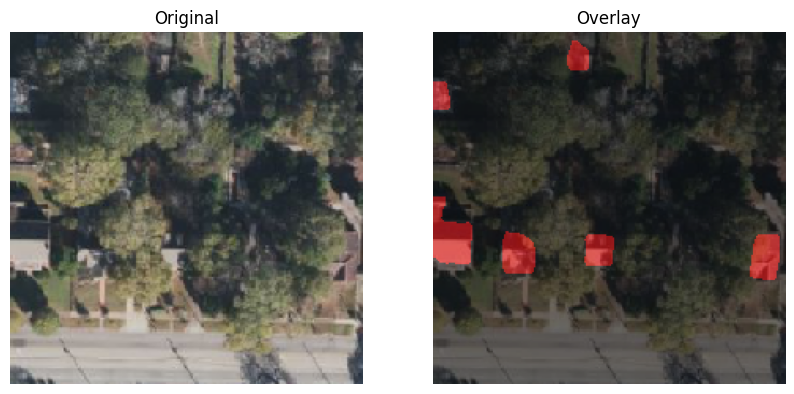

In [12]:
import os
import matplotlib.pyplot as plt

i = random.randint(0, len(sub))

img_id = sub.iloc[i]['img_id']
pred = sub.iloc[i]['mask_rle']

image = cv2.imread(os.path.join(gt_dir, img_id + '.png'))
mask = rle_decode(pred, image.shape[:2])


# 마스크의 클래스에 따라 시각화를 위한 색상 매핑
class_colors = {
    0: (0, 0, 0),  # 배경 (투명)
    1: (0, 0, 255)  # 건물 (녹색, 50% 투명도)
}

# 클래스에 해당하는 색상으로 마스크 색칠
masked_image = np.zeros_like(image)
for class_id, color in class_colors.items():
    masked_image[mask == class_id] = color

# 시맨틱 세그멘테이션을 원본 이미지 위에 겹쳐서 그림
overlay = cv2.addWeighted(image, 0.5, masked_image, 0.5, 0)

# 원본 이미지와 겹친 시맨틱 세그멘테이션을 함께 출력
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original")
ax[0].axis("off")
ax[1].imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
ax[1].set_title("Overlay")
ax[1].axis("off")
plt.show()
